In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os
SMALL_SIZE = 8
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

In [2]:
test_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataValidationAllIncome.csv'))
pd.set_option('display.max_columns', None)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0,1,0,1,0,5720.0,0.0,110000.0,360.0,1,2,5720.0
1,0,1,1,1,0,3076.0,1500.0,126000.0,360.0,1,2,4576.0
2,0,1,2,1,0,5000.0,1800.0,208000.0,360.0,1,2,6800.0
3,0,1,2,1,0,2340.0,2546.0,100000.0,360.0,0,2,4886.0
4,0,0,0,0,0,3276.0,0.0,78000.0,360.0,1,2,3276.0
...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1,3,0,1,4009.0,1777.0,113000.0,360.0,1,2,5786.0
341,0,1,0,1,0,4158.0,709.0,115000.0,360.0,1,2,4867.0
342,0,0,0,1,0,3250.0,1993.0,126000.0,360.0,0,1,5243.0
343,0,1,0,1,0,5000.0,2393.0,158000.0,360.0,1,0,7393.0


In [3]:
train_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataTrainAllIncome.csv'))
pd.set_option('display.max_columns', None)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,1,1,0,4583.0,1508.0,128000.0,360.0,1,0,0,6091.0
1,0,1,0,1,1,3000.0,0.0,66000.0,360.0,1,2,1,3000.0
2,0,1,0,0,0,2583.0,2358.0,120000.0,360.0,1,2,1,4941.0
3,0,0,0,1,0,6000.0,0.0,141000.0,360.0,1,2,1,6000.0
4,0,1,2,1,1,5417.0,4196.0,267000.0,360.0,1,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,0,0,1,0,2900.0,0.0,71000.0,360.0,1,0,1,2900.0
559,0,1,3,1,0,4106.0,0.0,40000.0,180.0,1,0,1,4106.0
560,0,1,1,1,0,8072.0,240.0,253000.0,360.0,1,2,1,8312.0
561,0,1,2,1,0,7583.0,0.0,187000.0,360.0,1,2,1,7583.0


## 1a. KNN (Combined income)

In [5]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]

In [6]:
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.48737732,  0.73877435, -0.76620308, ...,  0.55727821,
         1.23961503, -0.40857726],
       [-0.48737732,  0.73877435,  1.21139753, ...,  0.55727821,
        -1.29979052,  1.64839807],
       [ 2.05179837,  0.73877435, -0.76620308, ...,  0.55727821,
        -0.03008774, -0.31752894],
       ...,
       [-0.48737732,  0.73877435, -0.76620308, ...,  0.55727821,
        -0.03008774, -0.66804054],
       [ 2.05179837, -1.35359328, -0.76620308, ...,  0.55727821,
        -1.29979052,  0.02027823],
       [-0.48737732, -1.35359328, -0.76620308, ...,  0.55727821,
         1.23961503, -0.75583131]])

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


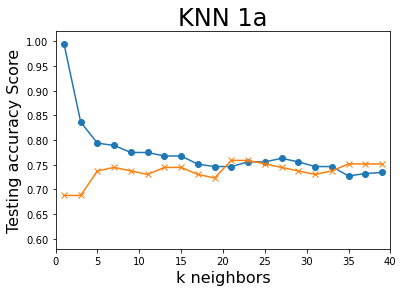

In [41]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 1a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_1a.png')
plt.show()


In [11]:
# Note that k: 5 seems to be approx. the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.752


## 1b. KNN (Applicant and co-applicant income separate)

In [13]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome"], axis=1)
feature_names = data.columns

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [15]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[-0.48737732,  0.73877435, -0.76620308, ...,  0.30723956,
         0.55727821,  1.23961503],
       [-0.48737732,  0.73877435,  1.21139753, ..., -0.57717446,
         0.55727821, -1.29979052],
       [ 2.05179837,  0.73877435, -0.76620308, ...,  0.30723956,
         0.55727821, -0.03008774],
       ...,
       [-0.48737732,  0.73877435, -0.76620308, ...,  0.30723956,
         0.55727821, -0.03008774],
       [ 2.05179837, -1.35359328, -0.76620308, ...,  0.30723956,
         0.55727821, -1.29979052],
       [-0.48737732, -1.35359328, -0.76620308, ...,  0.30723956,
         0.55727821,  1.23961503]])

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


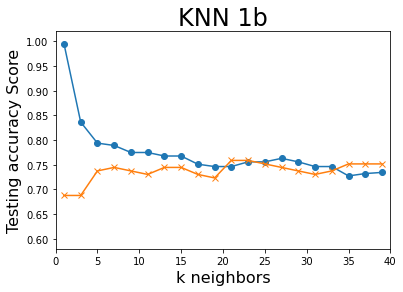

In [42]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 1b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_1b.png')
plt.show()

In [18]:
# Note that k: 5 seems to be approx. the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.766


## 2a. KNN, took out Loan_Amount_Term (Combined incomes)

In [20]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


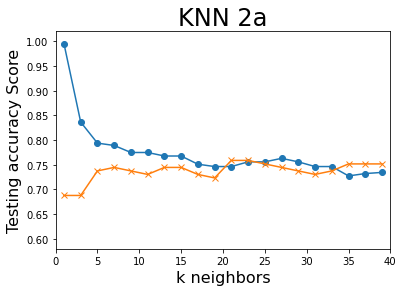

In [43]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 2a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_2a.png')
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.752


## 2b. KNN, took out Loan_Amount_Term (Applicant and co-applicant incomes separate)

In [24]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


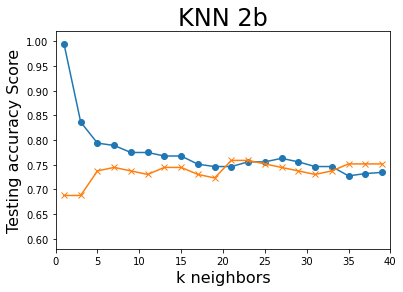

In [44]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 2b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_2b.png')
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.759


## 3a. KNN, took out Loan_Amount_Term and LoanAmount (Combined incomes)

In [30]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome"], axis=1)
feature_names = data.columns

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


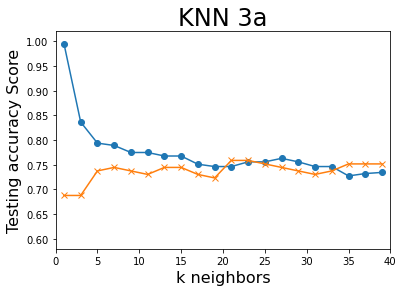

In [45]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 3a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_3a.png')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.752


## 3b. KNN, took out Loan_Amount_Term and LoanAmount (Applicant and co-applicant incomes separate)

In [36]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', "TotalIncome"], axis=1)
feature_names = data.columns

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.688
k: 3, Train/Test Score: 0.836/0.688
k: 5, Train/Test Score: 0.794/0.738
k: 7, Train/Test Score: 0.789/0.745
k: 9, Train/Test Score: 0.775/0.738
k: 11, Train/Test Score: 0.775/0.730
k: 13, Train/Test Score: 0.768/0.745
k: 15, Train/Test Score: 0.768/0.745
k: 17, Train/Test Score: 0.751/0.730
k: 19, Train/Test Score: 0.746/0.723
k: 21, Train/Test Score: 0.746/0.759
k: 23, Train/Test Score: 0.756/0.759
k: 25, Train/Test Score: 0.756/0.752
k: 27, Train/Test Score: 0.763/0.745
k: 29, Train/Test Score: 0.756/0.738
k: 31, Train/Test Score: 0.746/0.730
k: 33, Train/Test Score: 0.746/0.738
k: 35, Train/Test Score: 0.727/0.752
k: 37, Train/Test Score: 0.732/0.752
k: 39, Train/Test Score: 0.735/0.752


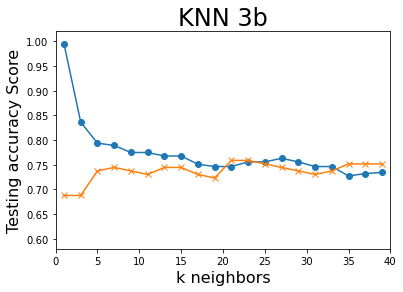

In [46]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 3b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_3b.png')
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.759


## 4a. KNN, took out Loan_Amount_Term and LoanAmount and also factors less important in Random Forest tests (Combined incomes)

In [47]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", 'Self_Employed', 'LoanAmount', 'Education', 'Married', 'Gender', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.667
k: 3, Train/Test Score: 0.834/0.723
k: 5, Train/Test Score: 0.787/0.738
k: 7, Train/Test Score: 0.777/0.716
k: 9, Train/Test Score: 0.782/0.745
k: 11, Train/Test Score: 0.777/0.738
k: 13, Train/Test Score: 0.775/0.738
k: 15, Train/Test Score: 0.775/0.738
k: 17, Train/Test Score: 0.775/0.745
k: 19, Train/Test Score: 0.775/0.745
k: 21, Train/Test Score: 0.770/0.745
k: 23, Train/Test Score: 0.773/0.745
k: 25, Train/Test Score: 0.775/0.745
k: 27, Train/Test Score: 0.768/0.745
k: 29, Train/Test Score: 0.770/0.745
k: 31, Train/Test Score: 0.773/0.745
k: 33, Train/Test Score: 0.773/0.745
k: 35, Train/Test Score: 0.773/0.745
k: 37, Train/Test Score: 0.773/0.745
k: 39, Train/Test Score: 0.773/0.745


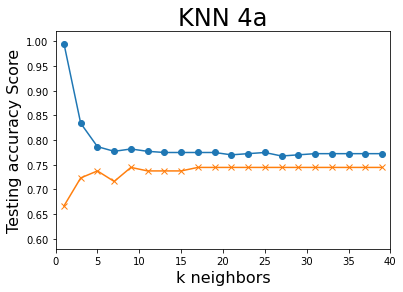

In [50]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 4a", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_4a.png')
plt.show()

In [52]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.745


## 4b. KNN, took out Loan_Amount_Term and LoanAmount and also factors less important in Random Forest tests (Applicant and Co-Applicant incomes considered separately)

In [53]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", 'Self_Employed', 'LoanAmount', 'Education', 'Gender', 'Married', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.995/0.716
k: 3, Train/Test Score: 0.829/0.709
k: 5, Train/Test Score: 0.801/0.730
k: 7, Train/Test Score: 0.773/0.738
k: 9, Train/Test Score: 0.773/0.738
k: 11, Train/Test Score: 0.775/0.745
k: 13, Train/Test Score: 0.773/0.745
k: 15, Train/Test Score: 0.770/0.745
k: 17, Train/Test Score: 0.773/0.745
k: 19, Train/Test Score: 0.770/0.745
k: 21, Train/Test Score: 0.770/0.745
k: 23, Train/Test Score: 0.770/0.745
k: 25, Train/Test Score: 0.770/0.745
k: 27, Train/Test Score: 0.770/0.745
k: 29, Train/Test Score: 0.770/0.745
k: 31, Train/Test Score: 0.770/0.745
k: 33, Train/Test Score: 0.770/0.745
k: 35, Train/Test Score: 0.768/0.745
k: 37, Train/Test Score: 0.770/0.745
k: 39, Train/Test Score: 0.770/0.745


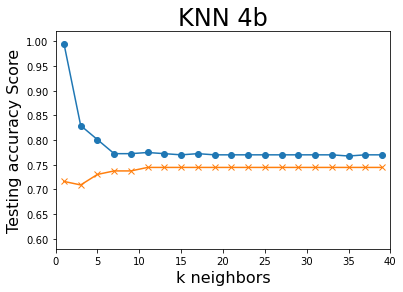

In [55]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 4b", fontsize=BIGGER_SIZE)
plt.savefig('../static/images/KNN_4b.png')
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.745


## 5. KNN, weights = distance, all factors...???

weights='distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [28]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 1.24549836, -0.51318299, -0.58926585, ...,  1.52752523,
        -0.78842985, -0.68074565],
       [-0.75173732, -0.30100616,  0.22454126, ...,  1.52752523,
        -0.78842985, -0.68074565],
       [-0.75173732, -0.46545932,  0.82555875, ...,  1.52752523,
        -0.78842985, -0.68074565],
       ...,
       [ 0.24688052,  0.81405076,  0.86328741, ..., -0.65465367,
        -0.78842985,  1.46897745],
       [-0.75173732, -0.2070099 ,  0.28075696, ..., -0.65465367,
         1.26834366, -0.68074565],
       [ 1.24549836,  0.07594628, -0.58926585, ..., -0.65465367,
         1.26834366, -0.68074565]])

k: 1, Train/Test Score: 1.000/0.700
k: 3, Train/Test Score: 1.000/0.767
k: 5, Train/Test Score: 1.000/0.783
k: 7, Train/Test Score: 1.000/0.792
k: 9, Train/Test Score: 1.000/0.775
k: 11, Train/Test Score: 1.000/0.775
k: 13, Train/Test Score: 1.000/0.775
k: 15, Train/Test Score: 1.000/0.775
k: 17, Train/Test Score: 1.000/0.775
k: 19, Train/Test Score: 1.000/0.767
k: 21, Train/Test Score: 1.000/0.775
k: 23, Train/Test Score: 1.000/0.767
k: 25, Train/Test Score: 1.000/0.767
k: 27, Train/Test Score: 1.000/0.767
k: 29, Train/Test Score: 1.000/0.767
k: 31, Train/Test Score: 1.000/0.758
k: 33, Train/Test Score: 1.000/0.758
k: 35, Train/Test Score: 1.000/0.758
k: 37, Train/Test Score: 1.000/0.767
k: 39, Train/Test Score: 1.000/0.750


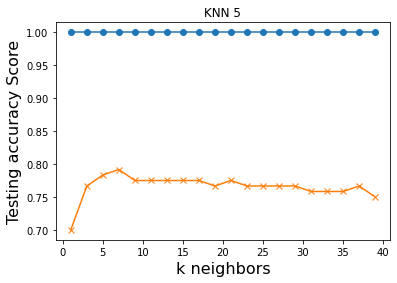

In [30]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors", fontsize=MEDIUM_SIZE)
plt.ylabel("Testing accuracy Score", fontsize=MEDIUM_SIZE)
plt.axis([0, 40, 0.58, 1.02])
plt.title("KNN 5")
plt.savefig('static/model_images/KNN_5.png')
plt.show()

#?? Something has to be done differently...